In [1]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from utils import *

In [2]:
# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
 
# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


In [3]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28))
testX = testX.reshape((testX.shape[0], 28 * 28))

## 1

In [4]:
# mlp_sigmoid = MLPClassifier(hidden_layer_sizes=(256, 32), activation='logistic', batch_size=64, validation_fraction=0.15, random_state=1, early_stopping=True)
# mlp_sigmoid.fit(trainX, trainy)

# # Save the model
# filename = 'mlp_sigmoid.sav'
# pickle.dump(mlp_sigmoid, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_sigmoid = pickle.load(open(f'Model_Saves/mlp_sigmoid.sav', 'rb'))

print("Accuracy with Sigmoid Activation: ", mlp_sigmoid.score(testX, testy))

Accuracy with Sigmoid Activation:  0.7836


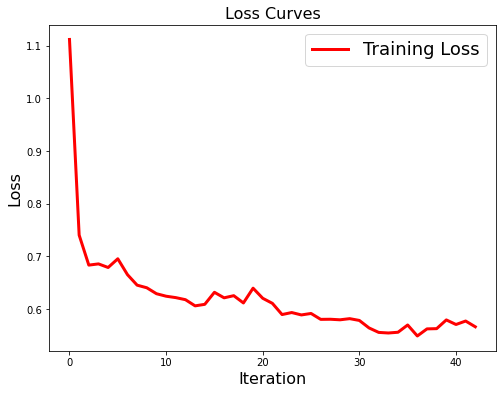

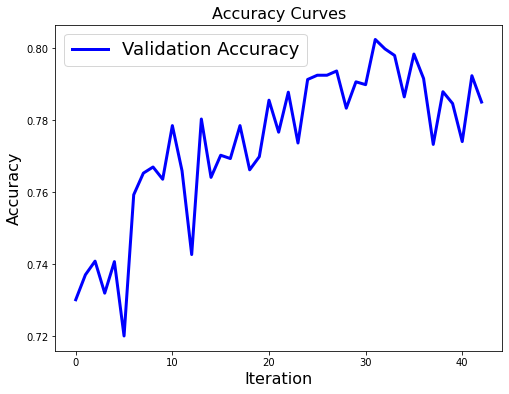

In [5]:
plot_curves(mlp_sigmoid)

In [6]:
# mlp_relu = MLPClassifier(hidden_layer_sizes=(256, 32), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1, early_stopping=True)
# mlp_relu.fit(trainX, trainy)

# # Save the model
# filename = 'mlp_relu.sav'
# pickle.dump(mlp_relu, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_relu = pickle.load(open('Model_Saves/mlp_relu.sav', 'rb'))

print("Accuracy with RELU Activation: ", mlp_relu.score(testX, testy))

Accuracy with RELU Activation:  0.8719


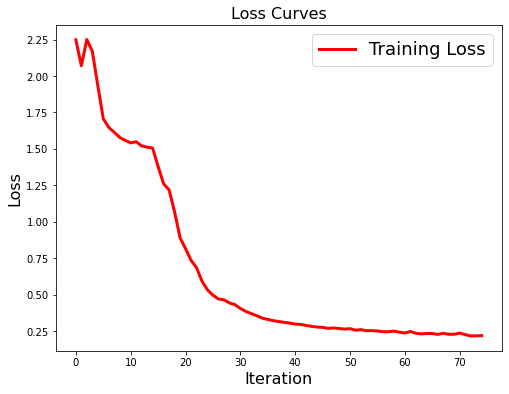

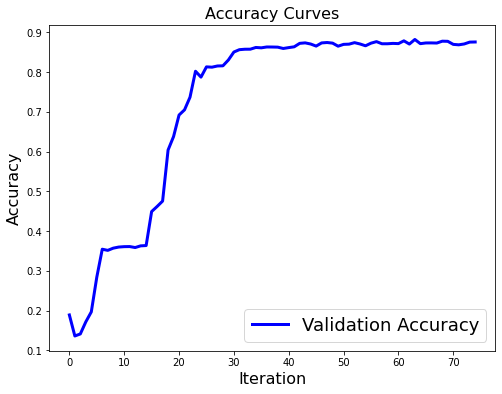

In [7]:
plot_curves(mlp_relu)

In [8]:
# mlp_tanh = MLPClassifier(hidden_layer_sizes=(256, 32), activation='tanh', batch_size=64, validation_fraction=0.15, random_state=1, early_stopping=True)
# mlp_tanh.fit(trainX, trainy)

# filename = 'mlp_tanh.sav'
# pickle.dump(mlp_tanh, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_tanh = pickle.load(open('Model_Saves/mlp_tanh.sav', 'rb'))

print("Accuracy with Tanh Activation: ", mlp_tanh.score(testX, testy))

Accuracy with Tanh Activation:  0.7667


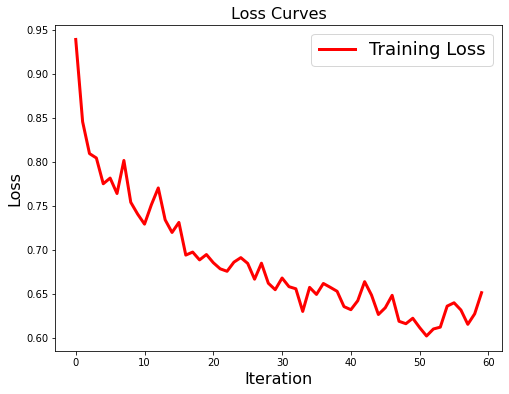

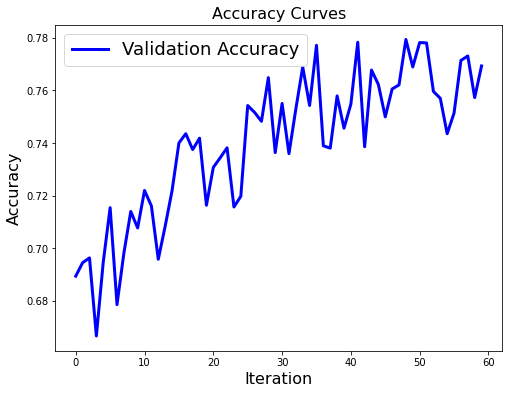

In [9]:
plot_curves(mlp_tanh)

In [10]:
# mlp_linear = MLPClassifier(hidden_layer_sizes=(256, 32), activation='identity', batch_size=64, validation_fraction=0.15, random_state=1, early_stopping=True)
# mlp_linear.fit(trainX, trainy)

# # Save the model
# filename = 'mlp_linear.sav'
# pickle.dump(mlp_linear, open(f'Model_Saves/{filename}', 'wb'))

# Load the Model
mlp_linear = pickle.load(open('Model_Saves/mlp_linear.sav', 'rb'))

print("Linear: ", mlp_linear.score(testX, testy))

Linear:  0.8356


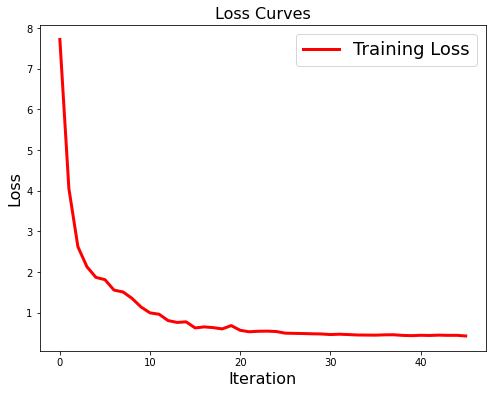

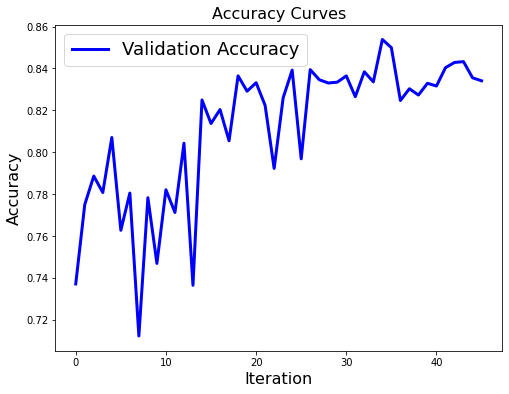

In [11]:
plot_curves(mlp_linear)

ReLU is the best activation function as it offers the highest accuracy while having a smoother loss and accuracy curves as compared to it's counterparts

## 2

In [12]:
# mlp_lr_one_tenth_relu = MLPClassifier(hidden_layer_sizes=(256, 32), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1, early_stopping=True, learning_rate_init=0.1)
# mlp_lr_one_tenth_relu.fit(trainX, trainy)

# # Save the model
# filename = 'mlp_lr_one_tenth_relu.sav'
# pickle.dump(mlp_lr_one_tenth_relu, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_lr_one_tenth_relu = pickle.load(open('Model_Saves/mlp_lr_one_tenth_relu.sav', 'rb'))

print("Accuracy with RELU Activation and Learning Rate of 0.1: ", mlp_lr_one_tenth_relu.score(testX, testy))

Accuracy with RELU Activation and Learning Rate of 0.1:  0.1


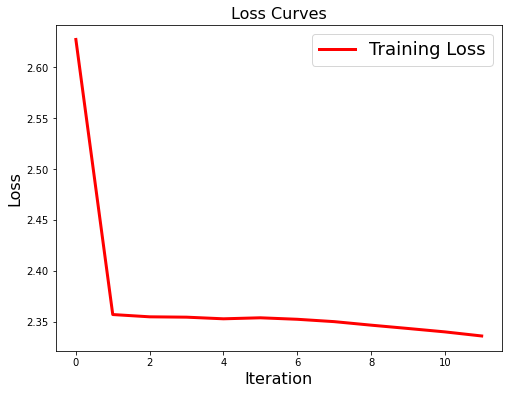

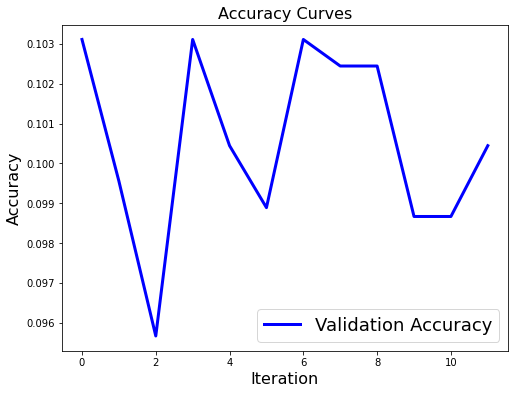

In [13]:
plot_curves(mlp_lr_one_tenth_relu)

In [14]:
# mlp_lr_one_hundredth_relu = MLPClassifier(hidden_layer_sizes=(256, 32), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1, early_stopping=True, learning_rate_init=0.01)
# mlp_lr_one_hundredth_relu.fit(trainX, trainy)

# # Save the model
# filename = 'mlp_lr_one_hundredth_relu.sav'
# pickle.dump(mlp_lr_one_hundredth_relu, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_lr_one_hundredth_relu = pickle.load(open('Model_Saves/mlp_lr_one_hundredth_relu.sav', 'rb'))

print("Accuracy with RELU Activation and Learning Rate of 0.01: ", mlp_lr_one_hundredth_relu.score(testX, testy))

Accuracy with RELU Activation and Learning Rate of 0.01:  0.1


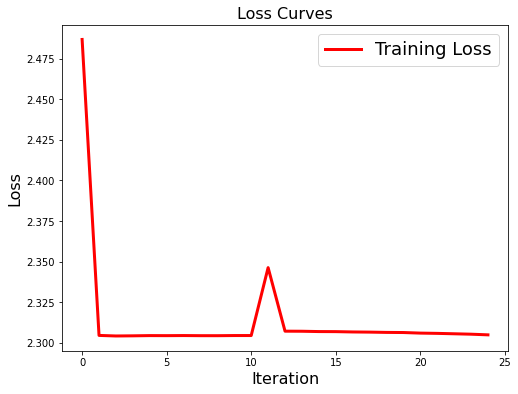

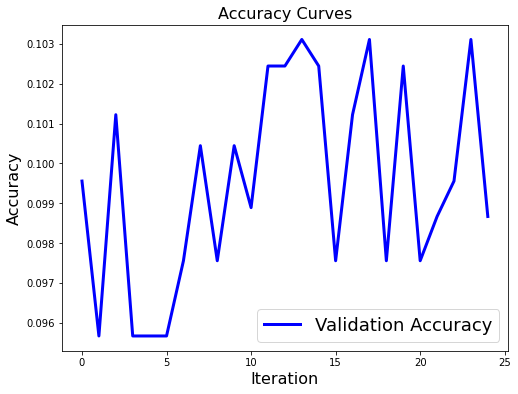

In [15]:
plot_curves(mlp_lr_one_hundredth_relu)

In [16]:
# mlp_lr_one_thousandth_relu = MLPClassifier(hidden_layer_sizes=(256, 32), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1, early_stopping=True, learning_rate_init=0.001)
# mlp_lr_one_thousandth_relu.fit(trainX, trainy)

# # Save the model
# filename = 'mlp_lr_one_thousandth_relu.sav'
# pickle.dump(mlp_lr_one_thousandth_relu, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_lr_one_thousandth_relu = pickle.load(open('Model_Saves/mlp_lr_one_thousandth_relu.sav', 'rb'))

print("Accuracy with RELU Activation and Learning Rate of 0.001: ", mlp_lr_one_thousandth_relu.score(testX, testy))

Accuracy with RELU Activation and Learning Rate of 0.001:  0.8719


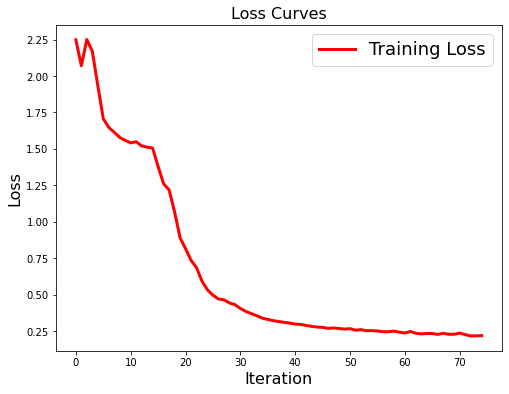

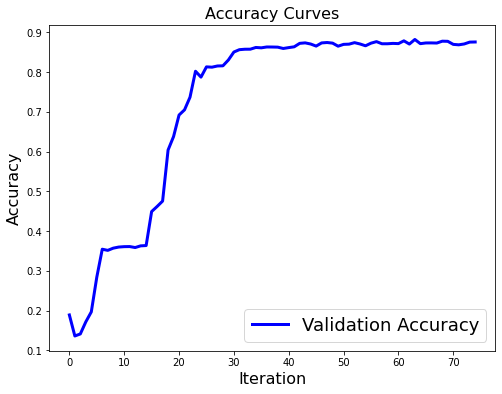

In [17]:
plot_curves(mlp_lr_one_thousandth_relu)

Learning Rate of 0.1 and 0.01 fail to converge while 0.001 performs best

## 3

In [18]:
# mlp_64_64 = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1, early_stopping=True)
# mlp_64_64.fit(trainX, trainy)

# # Save the model
# filename = 'mlp_64_64.sav'
# pickle.dump(mlp_64_64, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_64_64 = pickle.load(open('Model_Saves/mlp_64_64.sav', 'rb'))

print("Accuracy with RELU Activation and 64-64 Neurons in Hidden Layers: ", mlp_64_64.score(testX, testy))

Accuracy with RELU Activation and 64-64 Neurons in Hidden Layers:  0.8544


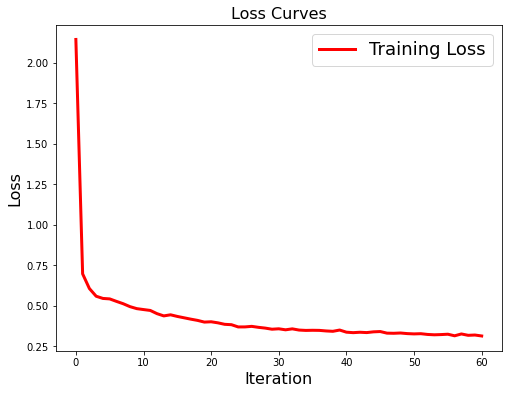

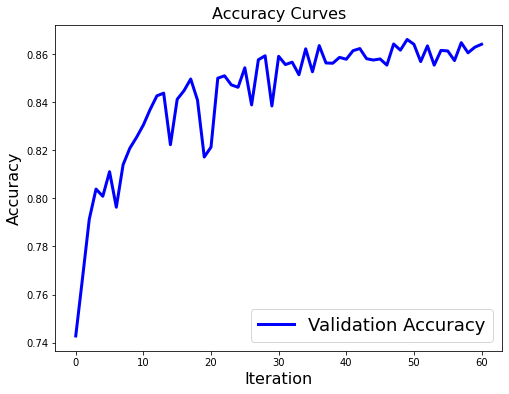

In [19]:
plot_curves(mlp_64_64)

In [20]:
# mlp_128_64 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1, early_stopping=True)
# mlp_128_64.fit(trainX, trainy)

# # Save the model
# filename = 'mlp_128_64.sav'
# pickle.dump(mlp_128_64, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_128_64 = pickle.load(open('Model_Saves/mlp_128_64.sav', 'rb'))

print("Accuracy with RELU Activation and 128-64 Neurons in Hidden Layers: ", mlp_128_64.score(testX, testy))

Accuracy with RELU Activation and 128-64 Neurons in Hidden Layers:  0.8725


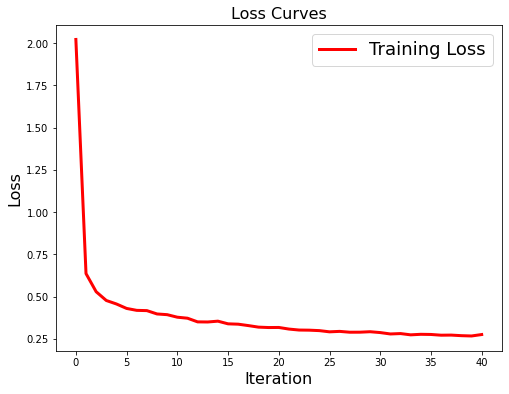

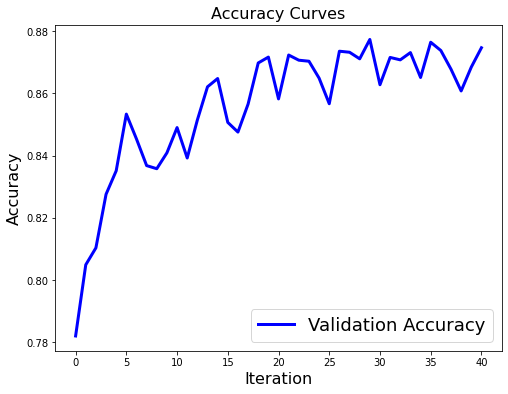

In [21]:
plot_curves(mlp_128_64)

In [22]:
# mlp_128_128 = MLPClassifier(hidden_layer_sizes=(128, 128), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1, early_stopping=True)
# mlp_128_128.fit(trainX, trainy)

# # Save the model
# filename = 'mlp_128_128.sav'
# pickle.dump(mlp_128_128, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_128_128 = pickle.load(open('Model_Saves/mlp_128_128.sav', 'rb'))

print("Accuracy with RELU Activation and 128-128 Neurons in Hidden Layers: ", mlp_128_128.score(testX, testy))

Accuracy with RELU Activation and 128-128 Neurons in Hidden Layers:  0.8602


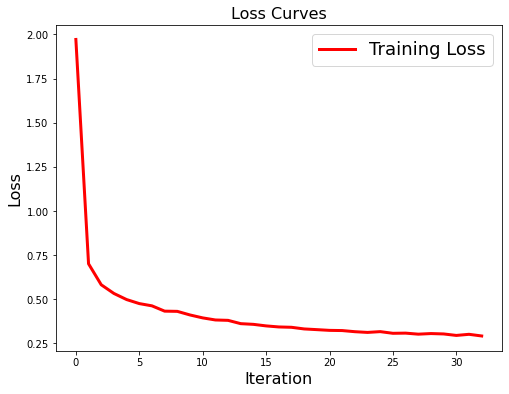

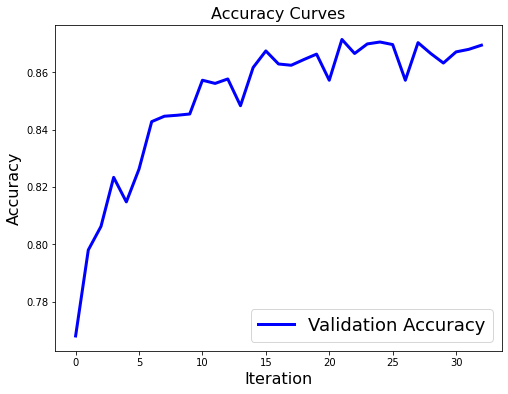

In [23]:
plot_curves(mlp_128_128)

In [24]:
# mlp_128_32 = MLPClassifier(hidden_layer_sizes=(128, 32), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1, early_stopping=True)
# mlp_128_32.fit(trainX, trainy)

# # Save the model
# filename = 'mlp_128_32.sav'
# pickle.dump(mlp_128_32, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_128_32 = pickle.load(open('Model_Saves/mlp_128_32.sav', 'rb'))

print("Accuracy with RELU Activation and 128-32 Neurons in Hidden Layers: ", mlp_128_32.score(testX, testy))


Accuracy with RELU Activation and 128-32 Neurons in Hidden Layers:  0.8579


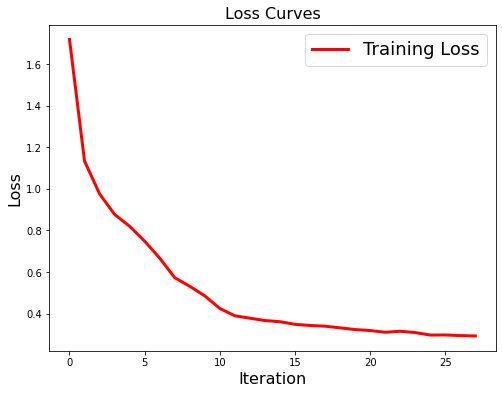

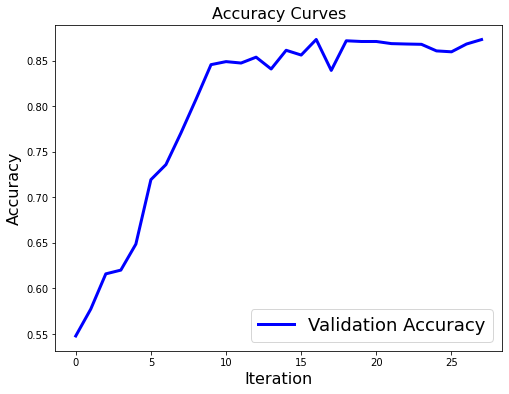

In [25]:
plot_curves(mlp_128_32)

In [26]:
# mlp_64_32 = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1, early_stopping=True)
# mlp_64_32.fit(trainX, trainy)

# # Save the model
# filename = 'mlp_64_32.sav'
# pickle.dump(mlp_64_32, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_64_32 = pickle.load(open('Model_Saves/mlp_64_32.sav', 'rb'))

print("Accuracy with RELU Activation and 64-32 Neurons in Hidden Layers: ", mlp_64_32.score(testX, testy))

Accuracy with RELU Activation and 64-32 Neurons in Hidden Layers:  0.8629


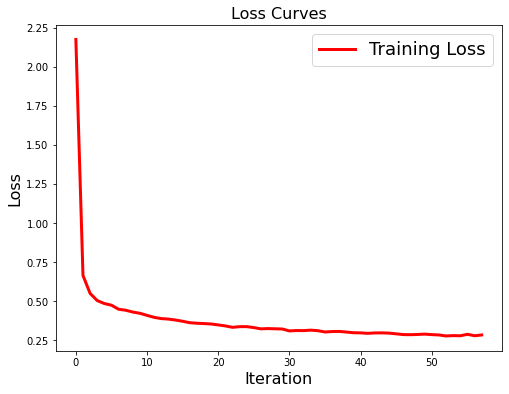

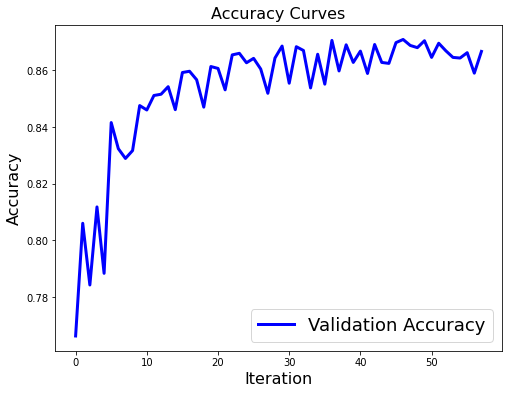

In [27]:
plot_curves(mlp_64_32)

Hidden Layers of Sizes 128 and 64 work best for as per the experiments, hence they've been used for future experiments

## 4

In [31]:
# Cross Validation
from sklearn.model_selection import GridSearchCV
import os

# # Create the parameter grid based on the results of random search
# param_grid = {
#     'hidden_layer_sizes': [(128, 64)],
#     'activation': ['relu'],
#     'batch_size': [64, 32],
#     'solver': ['sgd', 'adam', 'lbfgs'],
#     'validation_fraction': [0.15],
#     'random_state': [1],
#     'early_stopping': [True],
#     'learning_rate_init': [0.001, 0.0001]
# }

# # Create a based model
# mlp = MLPClassifier()

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, n_jobs=os.cpu_count()//3, cv=[(slice(None), slice(None))], verbose = 2)

# # Fit the grid search to the data
# grid_search.fit(trainX, trainy)

# # Save the model
# filename = 'mlp_grid_search.sav'
# pickle.dump(grid_search, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
grid_search = pickle.load(open('Model_Saves/mlp_grid_search.sav', 'rb'))

mlp = grid_search.best_estimator_

grid_search.best_params_, grid_search.best_score_

({'activation': 'relu',
  'batch_size': 32,
  'early_stopping': True,
  'hidden_layer_sizes': (128, 64),
  'learning_rate_init': 0.0001,
  'random_state': 1,
  'solver': 'adam',
  'validation_fraction': 0.15},
 0.9403666666666667)

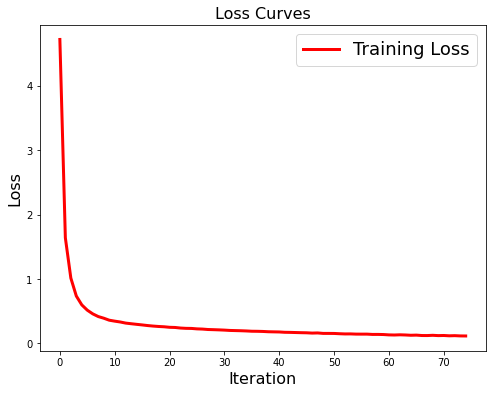

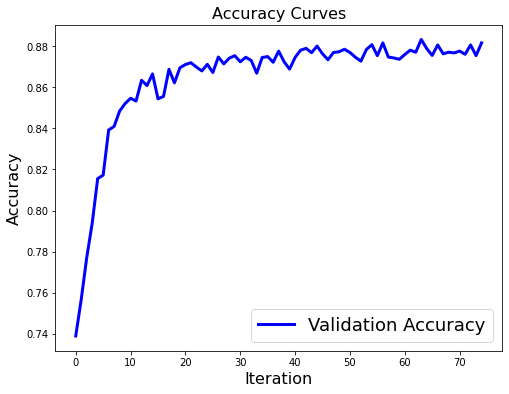

In [32]:
plot_curves(mlp)